In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib import dates
pd.options.mode.chained_assignment = None

In [2]:
r = requests.post(
    'https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.json')
r.encoding = 'uft-8'

df = pd.read_json(StringIO(r.text.replace("/", "-")))

mdf = pd.DataFrame(columns=['Time', '基隆市', '台北市', '新北市'])
mdf['Time'] = pd.date_range(
    start="2021-05-17", end=datetime.today().strftime('%Y-%m-%d'))
mdf = mdf.replace(np.nan, 0)

In [3]:
for i in range(len(mdf)):
    for j in range(len(df)):
        date = str(df['個案研判日'][j])[0:4]+'-'+str(df['個案研判日']
                                                [j])[4:6]+'-'+str(df['個案研判日'][j])[6:8]
        if (df['縣市'][j] == '基隆市' and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['基隆市'][i] = df['確定病例數'][j] + mdf['基隆市'][i]
        if (df['縣市'][j] == '台北市' and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['台北市'][i] = df['確定病例數'][j] + mdf['台北市'][i]
        if (df['縣市'][j] == '新北市' and date == mdf['Time'][i].strftime('%Y-%m-%d')):
            mdf['新北市'][i] = df['確定病例數'][j] + mdf['新北市'][i]

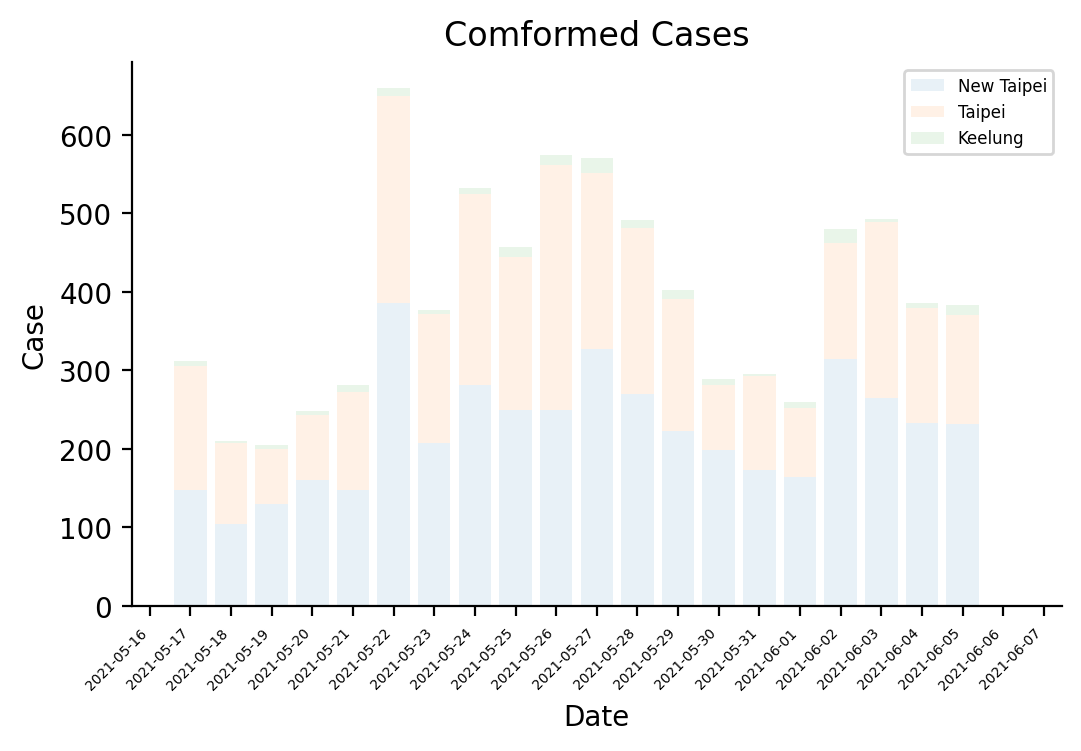

In [4]:
fig, ax = plt.subplots(dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.bar(mdf["Time"], mdf["新北市"], alpha=0.1, label="New Taipei")
plt.bar(mdf["Time"], mdf["台北市"], alpha=0.1, label="Taipei", bottom=mdf["新北市"])
plt.bar(mdf["Time"], mdf["基隆市"], alpha=0.1,
        label="Keelung", bottom=mdf["台北市"]+mdf["新北市"])
plt.legend(prop={'size': 6})
plt.xlabel("Date")
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
fig.autofmt_xdate(rotation=45)
plt.xticks(fontsize=5)
plt.ylabel("Case")
plt.title('Comformed Cases')
plt.show()

In [10]:
print(mdf)

         Time  基隆市  台北市  新北市
0  2021-05-17    6  158  148
1  2021-05-18    3  103  104
2  2021-05-19    5   70  130
3  2021-05-20    5   82  161
4  2021-05-21    8  126  147
5  2021-05-22   10  264  386
6  2021-05-23    5  165  207
7  2021-05-24    7  244  281
8  2021-05-25   12  196  249
9  2021-05-26   13  312  250
10 2021-05-27   18  225  327
11 2021-05-28    9  212  270
12 2021-05-29   12  168  223
13 2021-05-30    7   83  199
14 2021-05-31    3  120  173
15 2021-06-01    8   88  164
16 2021-06-02   18  147  315
17 2021-06-03    4  224  265
18 2021-06-04    6  147  233
19 2021-06-05   12  139  232
20 2021-06-06    0    0    0
